*Buyer's Time Prediction - Machine Hack*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Train.csv")

In [3]:
test = pd.read_csv("Test.csv")

In [4]:
train.head(10)

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877
5,b4ae55a4553d43697dcf64b66033677b,550,Product/160402 Android/5.0 Device/LGE_LG-D855 ...,Android Phone - Android,2020-02-06,0,1,0,6010.343
6,a17491477ea11e951286f583b3095899,198,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:30.0) G...,Desktop - Firefox,2019-05-30,1,1,1,8471.435
7,939dfd89beacc36f5f8acd5bfa062b57,2915,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,Android Tablet - Web,2020-01-03,0,0,0,83.030
8,1334aaff26b65ec26dc1e539c0ed20cb,319,Product/4.5.1 iPhone/8.1,iPhone - iOS,2019-10-19,0,0,0,97.722
9,750d0bfd2fb9ba1628586bb98c1611ca,2574,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-03-04,0,1,0,44.841


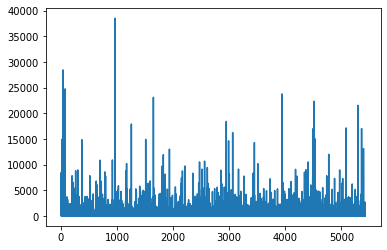

In [5]:
train['time_spent'].plot(sort_columns=True)

In [6]:
train.shape

(5429, 9)

In [7]:
train["session_number"].value_counts()

11      437
22      192
33      132
44      101
55       93
       ... 
3949      1
3696      1
5962      1
7601      1
6083      1
Name: session_number, Length: 610, dtype: int64

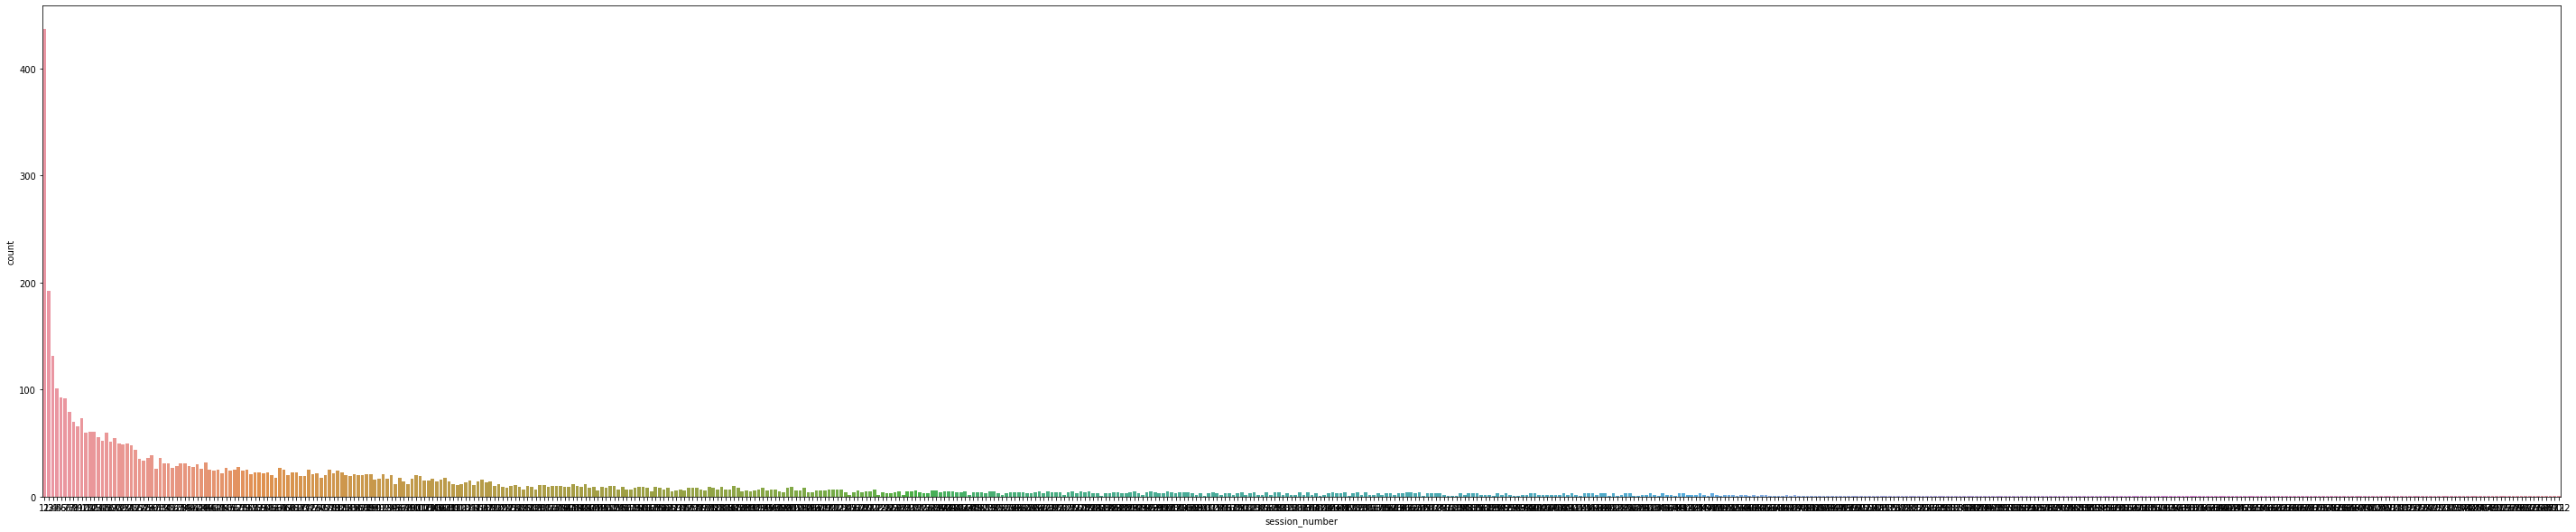

In [8]:
plt.figure(figsize = (50,10))
sns.countplot(x = "session_number", data = train)

In [9]:
train = train.drop(train[train.time_spent > 30000].index)

In [10]:
train.time_spent = np.log(train.time_spent)

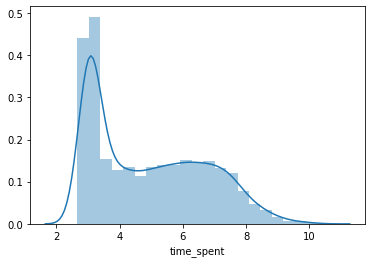

In [11]:
sns.distplot(train.time_spent)

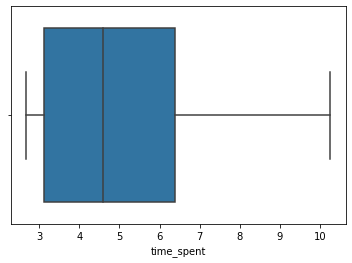

In [12]:
sns.boxplot(train.time_spent)

In [13]:
train.dtypes

session_id         object
session_number      int64
client_agent       object
device_details     object
date               object
purchased           int64
added_in_cart       int64
checked_out         int64
time_spent        float64
dtype: object

In [14]:
from datetime import datetime
train['Year'] = pd.to_datetime(train['date']).dt.year
train['Month'] = pd.to_datetime(train['date']).dt.month
train['Date'] = pd.to_datetime(train['date']).dt.day
train['dayofWeek'] = pd.to_datetime(train['date']).dt.day_name()
train['dayofWeek'] = train['dayofWeek'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,
                                           'Friday':5, 'Saturday':6,'Sunday':7})

In [15]:
train = train.drop("date",axis = 1)

In [16]:
train.head()

,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,Year,Month,Date,dayofWeek
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,1,0,0,5.467579,2020,1,22,3
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,1,0,0,7.152625,2020,2,27,4
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,0,0,0,3.077497,2019,8,1,4
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,0,1,0,6.120739,2019,12,30,1
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,0,0,0,7.060371,2019,9,10,2


In [17]:
train.isna().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
Year                0
Month               0
Date                0
dayofWeek           0
dtype: int64

In [18]:
train.shape

(5428, 12)

In [19]:
train.isna().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
Year                0
Month               0
Date                0
dayofWeek           0
dtype: int64

In [20]:
train.shape

(5428, 12)

In [21]:
train.time_spent.max()

10.255517213836571

In [22]:
train.time_spent.min()

2.667228206581955

In [23]:
train.Year.value_counts()

2019    3973
2020    1455
Name: Year, dtype: int64

In [24]:
train['device_details'].value_counts()

iPhone - iOS                  1514
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [25]:
train.device_details.value_counts()

iPhone - iOS                  1514
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [26]:
train.device_details[train.loc[:,"device_details"] == "iPhone - iOS"] = "iPhone_m"
train.device_details[train.loc[:,"device_details"] == "Desktop - Chrome"] = "web"
train.device_details[train.loc[:,"device_details"] == "iPhone - Web"] = "iPhone_w"
train.device_details[train.loc[:,"device_details"] == "Android Phone - Android"] = "android_m"
train.device_details[train.loc[:,"device_details"] == "Desktop - Safari"] = "web"
train.device_details[train.loc[:,"device_details"] == "Desktop - IE"] = "web"
train.device_details[train.loc[:,"device_details"] == "iPad - Web"] = "ipadweb"
train.device_details[train.loc[:,"device_details"] == "iPhone - MobileWeb"] = "iPhone_w"
train.device_details[train.loc[:,"device_details"] == "Desktop - Firefox"] = "web"
train.device_details[train.loc[:,"device_details"] == "Android Tablet - Web"] = "android_w"
train.device_details[train.loc[:,"device_details"] == "Other - Other"] = "Other"
train.device_details[train.loc[:,"device_details"] == "Unknown - MobileWeb"] = "otherweb"
train.device_details[train.loc[:,"device_details"] == "Android Phone - Web"] = "android_w"
train.device_details[train.loc[:,"device_details"] == "iPad - iOS"] = "ipad"
train.device_details[train.loc[:,"device_details"] == "Android Phone - MobileWeb"] = "android_w"
train.device_details[train.loc[:,"device_details"] == "Android Tablet - Android"] = "tablet"
train.device_details[train.loc[:,"device_details"] == "Android Tablet - MobileWeb"] = "tablet"

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [27]:
train.device_details.value_counts()

web          1654
iPhone_m     1514
iPhone_w      942
android_w     343
android_m     326
ipadweb       289
Other         185
otherweb       87
ipad           77
tablet         11
Name: device_details, dtype: int64

In [28]:
train.device_details[train.device_details == 'Other']

19      Other
55      Other
92      Other
108     Other
120     Other
        ...  
5269    Other
5280    Other
5333    Other
5341    Other
5354    Other
Name: device_details, Length: 185, dtype: object

In [29]:
train.loc[92]

session_id                       60b10dc38cf71373c0215a4158680616
session_number                                                704
client_agent      Typhoeus - https://github.com/typhoeus/typhoeus
device_details                                              Other
purchased                                                       0
added_in_cart                                                   0
checked_out                                                     0
time_spent                                                4.94139
Year                                                         2019
Month                                                           9
Date                                                            3
dayofWeek                                                       2
Name: 92, dtype: object

In [30]:
train[train.client_agent == 'Typhoeus - https://github.com/typhoeus/typhoeus'] = 2

In [31]:
train.shape

(5428, 12)

In [32]:
train[train.client_agent == '-unknown-'] = 2

In [33]:
train[train.client_agent == 'Product/4.1.1 CFNetwork/672.0.2 Darwin/14.0.0'].index

Int64Index([1486, 2385, 3541, 4304, 4469, 4549, 4819], dtype='int64')

In [34]:
train.device_details[train.loc[:,"client_agent"] == "Product/4.1.1 CFNetwork/672.0.2 Darwin/14.0.0"] = "iphone_m"

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
train.device_details[train.loc[:,"client_agent"] == "Product/4.4.1 CFNetwork/711.1.12 Darwin/14.0.0"] = "iphone_m"

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
train.device_details[train.loc[:,"client_agent"] == "Opera/9.80 (Macintosh; Intel Mac OS X 10.7.5) Presto/2.12.388 Version/12.16"] = "web"

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
train.device_details[train.loc[:,"client_agent"] == "Product/4.4.1 CFNetwork/711.0.6 Darwin/14.0.0"] = "iphone_m"

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
train.device_details[train.loc[:,"client_agent"] == "Product/3.0.1 CFNetwork/672.0.8 Darwin/14.0.0"] = "iphone_m"

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
train.device_details[train.loc[:,"client_agent"] == "Opera/9.80 (Macintosh; Intel Mac OS X 10.7.5) Presto/2.12.388 Version/12.16"] = "web"

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
train['device_details'].value_counts()

web          1660
iPhone_m     1514
iPhone_w      942
android_w     343
android_m     326
ipadweb       289
Other         134
otherweb       87
ipad           77
2              32
iphone_m       13
tablet         11
Name: device_details, dtype: int64

In [41]:
for i, row in train.iterrows():
    if row['device_details'] == 'Other':
        if type(row['client_agent']) is str and 'Darwin' or 'iPhone' or 'iPad' in row['client_agent']:
                train.loc[i, 'device_details'] = "iphone_m"
        elif type(row['client_agent']) is str and 'Windows' or 'Macintosh' in row['client_agent']:
             train.loc[i, 'device_details'] = "web"
        elif type(row['client_agent']) is str and 'Android' in row['client_agent']:
             train.loc[i, 'device_details'] = "android_m"
        else:
            train.loc[i, 'device_details'] = 2
        

In [42]:
conditions=[(train["purchased"]==0) & (train["added_in_cart"]==0) & (train["checked_out"]==0),
    (train["purchased"]==0) & (train["added_in_cart"]==0) & (train["checked_out"]==1),
    (train["purchased"]==0) & (train["added_in_cart"]==1) & (train["checked_out"]==0),
    (train["purchased"]==0) & (train["added_in_cart"]==1) & (train["checked_out"]==1),
    (train["purchased"]==1) & (train["added_in_cart"]==0) & (train["checked_out"]==0),
    (train["purchased"]==1) & (train["added_in_cart"]==0) & (train["checked_out"]==1),
    (train["purchased"]==1) & (train["added_in_cart"]==1) & (train["checked_out"]==0),
    (train["purchased"]==1) & (train["added_in_cart"]==1) & (train["checked_out"]==1)]

values = ['no_activity','chk','add','add_chk','purc','purc_chk','purc_add','purc_add_chk']
train['customer_activity'] = np.select(conditions, values)

In [43]:
train['device_details'].value_counts()

web          1660
iPhone_m     1514
iPhone_w      942
android_w     343
android_m     326
ipadweb       289
iphone_m      147
otherweb       87
ipad           77
2              32
tablet         11
Name: device_details, dtype: int64

In [44]:
train.drop("session_id", axis = 1,inplace = True)

In [45]:
train.time_spent

0       5.467579
1       7.152625
2       3.077497
3       6.120739
4       7.060371
          ...   
5424    3.025340
5425    7.338021
5426    3.122849
5427    3.037066
5428    3.020620
Name: time_spent, Length: 5428, dtype: float64

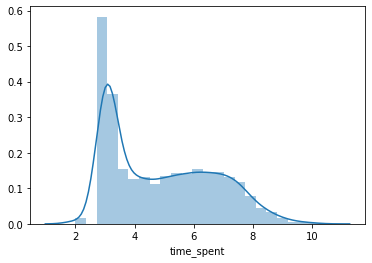

In [46]:
sns.distplot(train.time_spent)

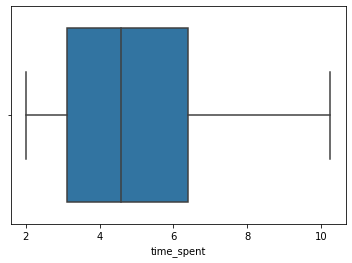

In [47]:
sns.boxplot(train.time_spent)

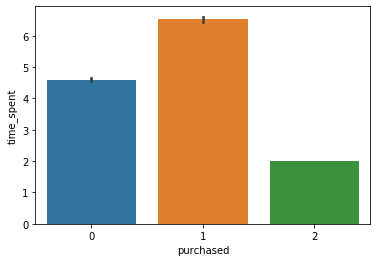

In [48]:
sns.barplot(x = train.purchased, y = train.time_spent)

In [49]:
sesh = train[["session_number","time_spent"]].groupby(["session_number"],as_index=False).sum().sort_values(["time_spent"],ascending=False)

In [50]:
sesh.head

<bound method NDFrame.head of      session_number   time_spent
1                11  2017.361538
2                22   967.051724
3                33   705.840609
4                44   502.072091
6                66   490.743360
..              ...          ...
508            6083     2.876949
576            7238     2.873452
480            5599     2.872038
528            6402     2.861572
519            6303     2.842056

[610 rows x 2 columns]>

In [51]:
sesh.tail(100)

,session_number,time_spent
513,6182,3.124125
529,6413,3.121307
605,7678,3.110711
571,7172,3.107095
446,5082,3.102432
...,...,...
508,6083,2.876949
576,7238,2.873452
480,5599,2.872038
528,6402,2.861572


In [52]:
sesh[(sesh.time_spent >0) & (sesh.time_spent <= 10) ].sum()

session_number    1.416591e+06
time_spent        1.306147e+03
dtype: float64

In [53]:
sesh.session_number[sesh[(sesh.time_spent >10) & (sesh.time_spent <100) ].index]

54      594
78      858
62      682
91     1001
76      836
       ... 
420    4675
258    2838
421    4686
293    3223
485    5698
Name: session_number, Length: 288, dtype: int64

In [54]:
sesh.loc[(sesh['time_spent'] >=0) & (sesh['time_spent'] <= 10), 'time_spent'] = 1
sesh.loc[(sesh['time_spent'] >10) & (sesh['time_spent'] <= 100), 'time_spent'] = 2
sesh.loc[(sesh['time_spent'] >100) & (sesh['time_spent'] <= 500), 'time_spent'] = 3
sesh.loc[(sesh['time_spent'] >500) & (sesh['time_spent'] <= 1000), 'time_spent'] = 4
sesh.loc[sesh['time_spent'] >1000, 'time_spent'] = 5

In [55]:
sesh["group_label"] = sesh["time_spent"]  

In [56]:
sesh.drop('time_spent', axis = 1, inplace= True)

In [57]:
sesh

,session_number,group_label
1,11,5.0
2,22,4.0
3,33,4.0
4,44,4.0
6,66,3.0
...,...,...
508,6083,1.0
576,7238,1.0
480,5599,1.0
528,6402,1.0


In [58]:
train = pd.merge(train, sesh, on='session_number', how='inner')

In [59]:
train.head()

,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,Year,Month,Date,dayofWeek,customer_activity,group_label
0,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,web,1,0,0,5.467579,2020,1,22,3,purc,3.0
1,715,Product/4.1.1 iPhone/7.1.2,iPhone_m,1,0,0,4.275151,2019,9,22,7,purc,3.0
2,715,Mozilla/5.0 (iPad; CPU OS 8_1_3 like Mac OS X)...,ipadweb,0,0,0,3.272303,2020,1,18,6,no_activity,3.0
3,715,Product/160406 Android/5.0 Device/LGE_LG-D855 ...,android_m,0,1,0,6.382650,2020,2,11,2,add,3.0
4,715,Product/4.3.1 iPhone/7.0.4,iPhone_m,0,0,0,3.702536,2019,10,20,7,no_activity,3.0


In [60]:
train.isna().sum()

session_number         0
client_agent         160
device_details         0
purchased              0
added_in_cart          0
checked_out            0
time_spent             0
Year                   0
Month                  0
Date                   0
dayofWeek              0
customer_activity      0
group_label            0
dtype: int64

In [61]:
group1 =list(train.session_number[train['group_label'] == 1].unique())

In [62]:
group2 =list(train.session_number[train['group_label'] == 2].unique())

In [63]:
group3 = list(train.session_number[train['group_label'] == 3].unique())

In [64]:
group4 = list(train.session_number[train['group_label'] == 4].unique())

In [65]:
group5 = (train.session_number[train['group_label'] == 5].unique())

In [66]:
group1

[7656,
 4169,
 2156,
 6699,
 4697,
 3278,
 5643,
 3784,
 6831,
 3388,
 5346,
 7315,
 4345,
 4851,
 4708,
 7326,
 5390,
 5071,
 4323,
 6556,
 4026,
 4279,
 2475,
 6017,
 5599,
 4202,
 4554,
 4103,
 6061,
 5137,
 3509,
 5214,
 3553,
 5126,
 3861,
 5764,
 3773,
 4543,
 7425,
 5269,
 6941,
 4499,
 7700,
 6391,
 4972,
 6369,
 2563,
 7348,
 7469,
 4389,
 4378,
 4070,
 6523,
 6655,
 7601,
 5280,
 2827,
 6237,
 5500,
 5302,
 6336,
 5027,
 5786,
 7623,
 5544,
 4928,
 3564,
 5489,
 5467,
 4092,
 5203,
 4059,
 5632,
 4609,
 7172,
 5258,
 6182,
 6611,
 4565,
 6974,
 5797,
 5709,
 6446,
 4642,
 7282,
 7403,
 3916,
 5368,
 4917,
 7634,
 7238,
 6413,
 3894,
 7216,
 5313,
 5423,
 4312,
 4125,
 4730,
 2937,
 3630,
 7304,
 6622,
 5808,
 5940,
 3476,
 5951,
 7249,
 6468,
 3212,
 3245,
 4466,
 6402,
 6314,
 5291,
 4268,
 5654,
 4037,
 7711,
 7590,
 6171,
 7007,
 6083,
 4048,
 6930,
 6050,
 7491,
 7689,
 5995,
 4829,
 6358,
 5962,
 5522,
 3806,
 7018,
 4719,
 6600,
 7128,
 5401,
 5247,
 6270,
 4444,
 5555,

In [67]:
train.drop("session_number", axis =1, inplace= True)

In [68]:
train.shape

(5428, 12)

In [69]:
train[train == ' '].sum()

C:\Users\prana\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


client_agent         0.0
device_details       0.0
purchased            0.0
added_in_cart        0.0
checked_out          0.0
time_spent           0.0
Year                 0.0
Month                0.0
Date                 0.0
dayofWeek            0.0
customer_activity    0.0
group_label          0.0
dtype: float64

In [70]:
train.drop(["Date","dayofWeek"], axis = 1,inplace = True)

In [71]:
train.drop(["client_agent"], axis = 1,inplace = True)

In [72]:
train

,device_details,purchased,added_in_cart,checked_out,time_spent,Year,Month,customer_activity,group_label
0,web,1,0,0,5.467579,2020,1,purc,3.0
1,iPhone_m,1,0,0,4.275151,2019,9,purc,3.0
2,ipadweb,0,0,0,3.272303,2020,1,no_activity,3.0
3,android_m,0,1,0,6.382650,2020,2,add,3.0
4,iPhone_m,0,0,0,3.702536,2019,10,no_activity,3.0
...,...,...,...,...,...,...,...,...,...
5423,iPhone_w,0,0,0,8.002705,2019,9,no_activity,1.0
5424,iPhone_w,0,0,0,2.994982,2019,9,no_activity,1.0
5425,iPhone_w,0,0,0,3.085573,2019,12,no_activity,1.0
5426,iPhone_m,0,0,0,3.257404,2019,9,no_activity,1.0


In [73]:
device_details = pd.get_dummies(train['device_details'],drop_first=True)

In [74]:
device_details

,android_m,android_w,iPhone_m,iPhone_w,ipad,ipadweb,iphone_m,otherweb,tablet,web
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5423,0,0,0,1,0,0,0,0,0,0
5424,0,0,0,1,0,0,0,0,0,0
5425,0,0,0,1,0,0,0,0,0,0
5426,0,0,1,0,0,0,0,0,0,0


In [75]:
Year = pd.get_dummies(train['Year'],drop_first=True)

In [76]:
train.Month[train.loc[:,"Month"] == 1] = "qtr1"
train.Month[train.loc[:,"Month"] == 2] = "qtr1"
train.Month[train.loc[:,"Month"] == 3] = "qtr1"
train.Month[train.loc[:,"Month"] == 4] = "qtr2"
train.Month[train.loc[:,"Month"] == 5] = "qtr2"
train.Month[train.loc[:,"Month"] == 6] = "qtr2"
train.Month[train.loc[:,"Month"] == 7] = "qtr3"
train.Month[train.loc[:,"Month"] == 8] = "qtr3"
train.Month[train.loc[:,"Month"] == 9] = "qtr3"
train.Month[train.loc[:,"Month"] == 10] = "qtr4"
train.Month[train.loc[:,"Month"] == 11] = "qtr4"
train.Month[train.loc[:,"Month"] == 12] = "qtr4"

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
Month = pd.get_dummies(train['Month'],drop_first=True)

In [78]:
Year

,2019,2020
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
5423,1,0
5424,1,0
5425,1,0
5426,1,0


In [79]:
train.drop(["device_details","Year","Month"], axis = 1,inplace = True)

In [80]:
train.checked_out.value_counts()

0    5301
1      95
2      32
Name: checked_out, dtype: int64

In [81]:
train = pd.concat([train,device_details,Year,Month], axis=1)

In [82]:
train.drop(["purchased","added_in_cart","checked_out"], axis = 1,inplace = True)

In [83]:
train = pd.get_dummies(train, columns=['customer_activity'])

In [84]:
train = pd.get_dummies(train, columns=['group_label'])

In [85]:
train.drop("group_label_1.0",axis =1, inplace = True)

In [86]:
train.drop(["customer_activity_0"], axis = 1,inplace = True)

In [87]:
train

,time_spent,android_m,android_w,iPhone_m,iPhone_w,ipad,ipadweb,iphone_m,otherweb,tablet,...,customer_activity_chk,customer_activity_no_activity,customer_activity_purc,customer_activity_purc_add,customer_activity_purc_add_chk,customer_activity_purc_chk,group_label_2.0,group_label_3.0,group_label_4.0,group_label_5.0
0,5.467579,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,4.275151,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,3.272303,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,6.382650,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.702536,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423,8.002705,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5424,2.994982,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5425,3.085573,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5426,3.257404,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


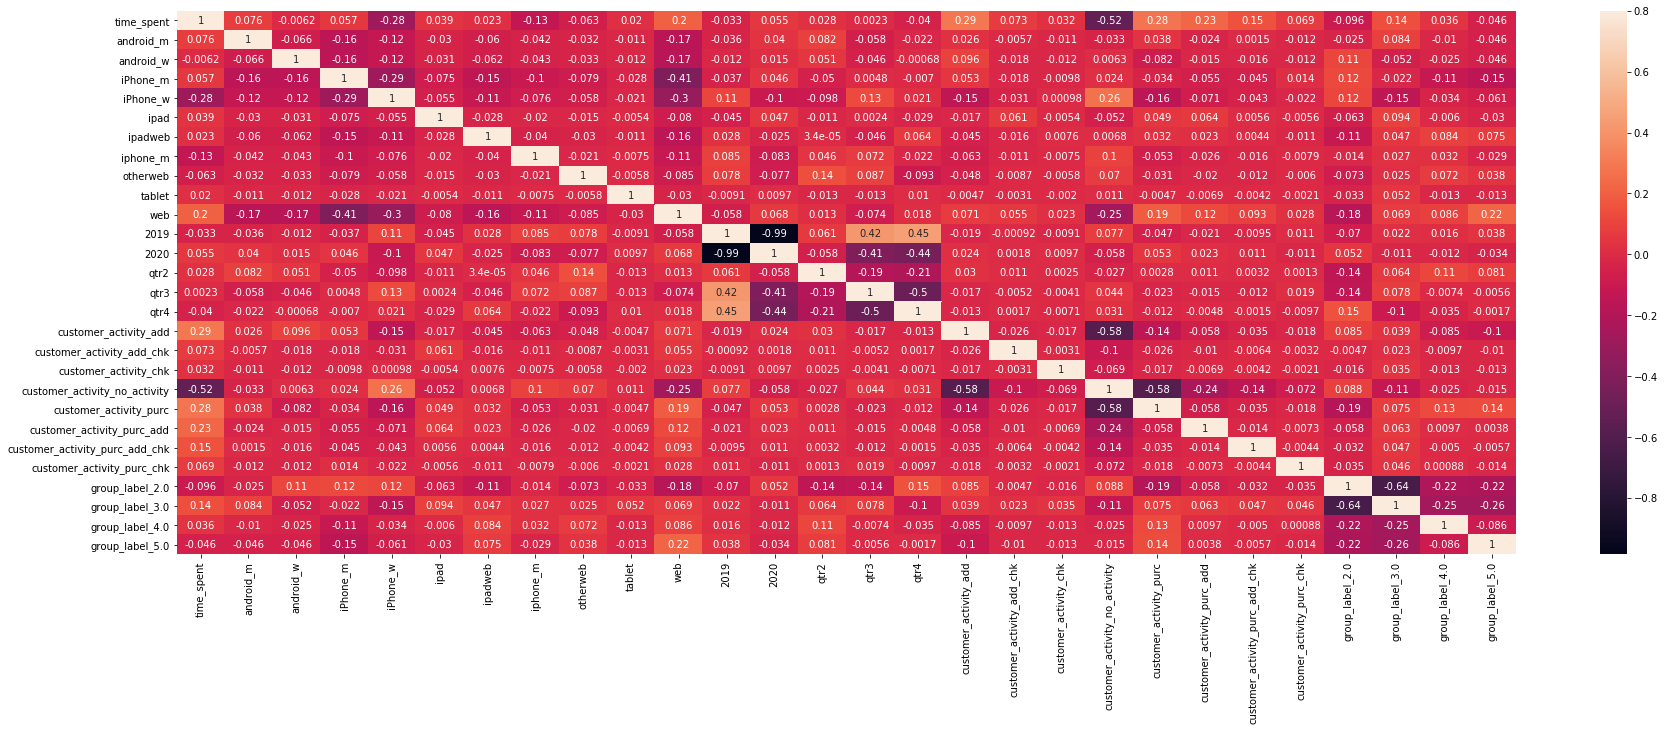

In [88]:
corr_matrix = train.corr()
f , ax = plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix,vmax=0.8, annot=True)

In [89]:
test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [90]:
len(test)

2327

In [91]:
test['Year'] = pd.to_datetime(test['date']).dt.year
test['Month'] = pd.to_datetime(test['date']).dt.month
test['Date'] = pd.to_datetime(test['date']).dt.day
test['dayofWeek'] = pd.to_datetime(test['date']).dt.day_name()
test['dayofWeek'] = test['dayofWeek'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,
                                           'Friday':5, 'Saturday':6,'Sunday':7})
test = test.drop("date",axis = 1)

In [92]:
#test['device_details'] = test['device_details'].str.split(' - ').str[1] 

In [93]:
test.device_details.value_counts()

iPhone - iOS                 615
Desktop - Chrome             366
iPhone - Web                 279
iPhone - MobileWeb           152
Desktop - IE                 137
Desktop - Safari             130
Android Phone - Android      125
iPad - Web                   124
Android Tablet - Web          96
Desktop - Firefox             93
Other - Other                 82
iPad - iOS                    44
Unknown - MobileWeb           35
Android Phone - Web           26
Android Phone - MobileWeb     18
Android Tablet - Android       5
Name: device_details, dtype: int64

In [94]:
test.device_details[test.loc[:,"device_details"] == "iPhone - iOS"] = "iPhone_m"
test.device_details[test.loc[:,"device_details"] == "Desktop - Chrome"] = "web"
test.device_details[test.loc[:,"device_details"] == "iPhone - Web"] = "iPhone_w"
test.device_details[test.loc[:,"device_details"] == "Android Phone - Android"] = "android_m"
test.device_details[test.loc[:,"device_details"] == "Desktop - Safari"] = "web"
test.device_details[test.loc[:,"device_details"] == "Desktop - IE"] = "web"
test.device_details[test.loc[:,"device_details"] == "iPad - Web"] = "ipadweb"
test.device_details[test.loc[:,"device_details"] == "iPhone - MobileWeb"] = "iPhone_w"
test.device_details[test.loc[:,"device_details"] == "Desktop - Firefox"] = "web"
test.device_details[test.loc[:,"device_details"] == "Android Tablet - Web"] = "android_w"
test.device_details[test.loc[:,"device_details"] == "Other - Other"] = "Other"
test.device_details[test.loc[:,"device_details"] == "Unknown - MobileWeb"] = "otherweb"
test.device_details[test.loc[:,"device_details"] == "Android Phone - Web"] = "android_w"
test.device_details[test.loc[:,"device_details"] == "iPad - iOS"] = "ipad"
test.device_details[test.loc[:,"device_details"] == "Android Phone - MobileWeb"] = "android_w"
test.device_details[test.loc[:,"device_details"] == "Android Tablet - Android"] = "tablet"
test.device_details[test.loc[:,"device_details"] == "Android Tablet - MobileWeb"] = "tablet"

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [95]:
test.isna().sum()

session_id         0
session_number     0
client_agent      59
device_details     0
purchased          0
added_in_cart      0
checked_out        0
Year               0
Month              0
Date               0
dayofWeek          0
dtype: int64

In [96]:
test.shape

(2327, 11)

In [97]:
test.drop("session_id", axis = 1,inplace = True)

In [98]:
test[test.client_agent == 'Typhoeus - https://github.com/typhoeus/typhoeus'] = 2

In [99]:
test[test.client_agent == '-unknown-'] = 2

In [100]:
for i, row in test.iterrows():
    if row['device_details'] == 'Other':
        if type(row['client_agent']) is str and 'Darwin' or 'iPhone' or 'iPad' in row['client_agent']:
                test.loc[i, 'device_details'] = "iphone_m"
        elif type(row['client_agent']) is str and 'Windows' or 'Macintosh' in row['client_agent']:
             test.loc[i, 'device_details'] = "web"
        elif type(row['client_agent']) is str and 'Android' in row['client_agent']:
             test.loc[i, 'device_details'] = "android_m"
        else:
            test.loc[i, 'device_details'] = 2

In [101]:
test.device_details.value_counts()

web          726
iPhone_m     615
iPhone_w     431
android_w    140
android_m    125
ipadweb      124
iphone_m      63
ipad          44
otherweb      35
2             19
tablet         5
Name: device_details, dtype: int64

In [102]:
group1test = list(test[test['session_number'].isin(group1)].index)

In [103]:
group2test = list(test[test['session_number'].isin(group2)].index)

In [104]:
group3test = list(test[test['session_number'].isin(group3)].index)

In [105]:
group4test = list(test[test['session_number'].isin(group4)].index)

In [106]:
group5test = list(test[test['session_number'].isin(group5)].index)

In [107]:
group1test

[42,
 61,
 64,
 73,
 86,
 161,
 162,
 172,
 184,
 229,
 245,
 280,
 302,
 310,
 325,
 362,
 364,
 365,
 385,
 395,
 396,
 398,
 450,
 489,
 502,
 506,
 561,
 565,
 566,
 570,
 577,
 603,
 616,
 626,
 639,
 643,
 656,
 689,
 705,
 723,
 733,
 734,
 741,
 759,
 766,
 772,
 872,
 881,
 901,
 913,
 959,
 961,
 1023,
 1034,
 1045,
 1050,
 1052,
 1053,
 1089,
 1113,
 1152,
 1160,
 1162,
 1219,
 1220,
 1257,
 1273,
 1288,
 1289,
 1335,
 1344,
 1359,
 1419,
 1439,
 1448,
 1452,
 1466,
 1538,
 1543,
 1573,
 1605,
 1625,
 1628,
 1635,
 1644,
 1665,
 1676,
 1702,
 1711,
 1725,
 1733,
 1740,
 1743,
 1755,
 1769,
 1795,
 1808,
 1813,
 1820,
 1852,
 1854,
 1862,
 1883,
 1889,
 1918,
 1921,
 1933,
 1982,
 1991,
 2005,
 2029,
 2044,
 2065,
 2085,
 2111,
 2141,
 2156,
 2185,
 2223,
 2242]

In [108]:
test["group_label"] = ''

In [109]:
test.group_label.value_counts()

    2327
Name: group_label, dtype: int64

In [110]:
test.session_number.value_counts()

11      193
22       72
33       62
44       59
55       43
       ... 
7227      1
3113      1
2904      1
3091      1
4092      1
Name: session_number, Length: 454, dtype: int64

In [111]:
test.group_label[group5test] = 5

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
test.group_label[group4test] = 4
test.group_label[group3test] = 3
test.group_label[group2test] = 2

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [113]:
test.group_label[group1test] = 1

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
test[test['group_label'] == '']

,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,Year,Month,Date,dayofWeek,group_label
84,6149,Product/4.2.2 iPhone/7.1.1,iPhone_m,0,0,0,2019,9,21,6,
89,6281,Product/4.2.2 iPhone/7.1.1,iPhone_w,0,0,0,2019,9,22,7,
94,3399,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1 like Ma...,iPhone_w,0,0,0,2019,12,26,4,
160,5753,Product/4.2.0 iPhone/7.1.1,iPhone_w,0,0,0,2019,9,18,3,
178,4587,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone_w,0,0,0,2019,9,13,5,
...,...,...,...,...,...,...,...,...,...,...,...
2206,5874,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone_w,0,0,0,2019,9,19,4,
2222,6193,Product/4.2.2 iPhone/7.1.1,iPhone_w,0,0,0,2019,9,21,6,
2243,4576,Product/5.0 iPhone/8.1.2,iPhone_m,0,0,0,2020,1,26,7,
2289,3828,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1...,web,0,1,0,2020,1,6,1,


In [115]:
test.drop(["client_agent"], axis = 1,inplace = True)

In [116]:
test.drop(["Date","dayofWeek"], axis = 1,inplace = True)

In [117]:
device_details = pd.get_dummies(test['device_details'],drop_first=True)

In [118]:
Year = pd.get_dummies(test['Year'],drop_first=True)

In [119]:
test.Month[test.loc[:,"Month"] == 1] = "qtr1"
test.Month[test.loc[:,"Month"] == 2] = "qtr1"
test.Month[test.loc[:,"Month"] == 3] = "qtr1"
test.Month[test.loc[:,"Month"] == 4] = "qtr2"
test.Month[test.loc[:,"Month"] == 5] = "qtr2"
test.Month[test.loc[:,"Month"] == 6] = "qtr2"
test.Month[test.loc[:,"Month"] == 7] = "qtr3"
test.Month[test.loc[:,"Month"] == 8] = "qtr3"
test.Month[test.loc[:,"Month"] == 9] = "qtr3"
test.Month[test.loc[:,"Month"] == 10] = "qtr4"
test.Month[test.loc[:,"Month"] == 11] = "qtr4"
test.Month[test.loc[:,"Month"] == 12] = "qtr4"

C:\Users\prana\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
Month = pd.get_dummies(test['Month'],drop_first=True)

In [121]:
test.drop(["device_details","Year","Month"], axis = 1,inplace = True)

In [122]:
test = pd.concat([test,device_details,Year,Month], axis=1)

In [123]:
conditions=[(test["purchased"]==0) & (test["added_in_cart"]==0) & (test["checked_out"]==0),
    (test["purchased"]==0) & (test["added_in_cart"]==0) & (test["checked_out"]==1),
    (test["purchased"]==0) & (test["added_in_cart"]==1) & (test["checked_out"]==0),
    (test["purchased"]==0) & (test["added_in_cart"]==1) & (test["checked_out"]==1),
    (test["purchased"]==1) & (test["added_in_cart"]==0) & (test["checked_out"]==0),
    (test["purchased"]==1) & (test["added_in_cart"]==0) & (test["checked_out"]==1),
    (test["purchased"]==1) & (test["added_in_cart"]==1) & (test["checked_out"]==0),
    (test["purchased"]==1) & (test["added_in_cart"]==1) & (test["checked_out"]==1)]

values = ['no_activity','chk','add','add_chk','purc','purc_chk','purc_add','purc_add_chk']
test['customer_activity'] = np.select(conditions, values)

In [124]:
test = pd.get_dummies(test, columns=['customer_activity'])

In [125]:
test.drop(["customer_activity_0"], axis = 1,inplace = True)

In [126]:
test.columns

Index([                'session_number',                      'purchased',
                        'added_in_cart',                    'checked_out',
                          'group_label',                      'android_m',
                            'android_w',                       'iPhone_m',
                             'iPhone_w',                           'ipad',
                              'ipadweb',                       'iphone_m',
                             'otherweb',                         'tablet',
                                  'web',                             2019,
                                   2020,                           'qtr2',
                                 'qtr3',                           'qtr4',
                'customer_activity_add',      'customer_activity_add_chk',
                'customer_activity_chk',  'customer_activity_no_activity',
               'customer_activity_purc',     'customer_activity_purc_add',
       'customer_activity

In [127]:
test.drop(["group_label"], axis = 1,inplace = True)

In [128]:
import statsmodels.api as sm

In [129]:
train.columns

Index([                    'time_spent',                      'android_m',
                            'android_w',                       'iPhone_m',
                             'iPhone_w',                           'ipad',
                              'ipadweb',                       'iphone_m',
                             'otherweb',                         'tablet',
                                  'web',                             2019,
                                   2020,                           'qtr2',
                                 'qtr3',                           'qtr4',
                'customer_activity_add',      'customer_activity_add_chk',
                'customer_activity_chk',  'customer_activity_no_activity',
               'customer_activity_purc',     'customer_activity_purc_add',
       'customer_activity_purc_add_chk',     'customer_activity_purc_chk',
                      'group_label_2.0',                'group_label_3.0',
                      'gr

In [130]:
train.drop(["group_label_2.0","group_label_3.0","group_label_4.0","group_label_5.0"], axis = 1,inplace = True)

In [131]:
x5 = train[['customer_activity_add','customer_activity_chk','customer_activity_no_activity','customer_activity_purc',2019,2020,'qtr4','android_m','android_w','iPhone_m','ipad','ipadweb','tablet','web']] 
y = train['time_spent'] 
x5 = sm.add_constant(x5) 
result = sm.OLS(y, x5).fit()  
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             time_spent   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     220.1
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:15:37   Log-Likelihood:                -9638.5
No. Observations:                5428   AIC:                         1.931e+04
Df Residuals:                    5413   BIC:                         1.941e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [132]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [133]:
reg = LinearRegression()

In [134]:
X = train[['customer_activity_add','customer_activity_chk','customer_activity_no_activity','customer_activity_purc',2019,2020,'qtr4','android_m','android_w','iPhone_m','ipad','ipadweb','tablet','web']]

In [135]:
Y = train['time_spent']

In [136]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [137]:
model = reg.fit(x_train,y_train)

In [138]:
test =test[['customer_activity_add','customer_activity_chk','customer_activity_no_activity','customer_activity_purc',2019,2020,'qtr4','android_m','android_w','iPhone_m','ipad','ipadweb','tablet','web']]

In [139]:
y_pred_reg = reg.predict(x_test)
from sklearn.metrics import r2_score
score_reg = r2_score(y_test,y_pred_reg)
score_reg

0.34747939025270125

In [141]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
print(cross_val_score(reg,X,Y,cv=10).mean())

model = reg.fit(x_train,y_train)
y_pred_cross = reg.predict(x_test)

from sklearn.metrics import r2_score
score_cross = r2_score(y_test,y_pred_cross)

score_cross

-1.8251315638622223e+24


0.34747939025270125

In [142]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(weights = 'distance', p=1)
clf.fit(X,Y)  
y_pred_knn = clf.predict(x_test)

from sklearn.metrics import r2_score
score_knn = r2_score(y_test,y_pred_knn)
score_knn

0.1949313393273816

In [143]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred_rf = random_forest.predict(x_test)
from sklearn.metrics import r2_score
score_rf = r2_score(y_test,y_pred_rf)
score_rf

0.345026768516315

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt 
from sklearn.metrics import mean_squared_log_error
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.2, n_estimators=100, random_state=33, subsample=0.7, loss='ls')
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
print('score', (sqrt(mean_squared_log_error(y_test, y_pred_gb))))

from sklearn.metrics import r2_score
score_gb = r2_score(y_test, y_pred_gb)
score_gb

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           2.8618           0.3562            5.23s
         2           2.5549           0.2272            2.69s
         3           2.4641           0.1466            1.84s
         4           2.3593           0.1253            1.39s
         5           2.2655           0.0606            1.14s
         6           2.1815           0.0621            0.98s
         7           2.1484           0.0418            0.86s
         8           2.1648           0.0153            0.78s
         9           2.1147           0.0147            0.71s
        10           2.0564           0.0061            0.65s
        20           1.9942          -0.0027            0.35s
        30           2.0406          -0.0009            0.25s
        40           2.0078          -0.0012            0.19s
        50           2.0466          -0.0021            0.14s
        60           1.9949          -0.0013            0.10s
       

0.34492469940498627

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt 
from sklearn.metrics import mean_squared_log_error
gb = GradientBoostingRegressor(verbose=1, learning_rate=0.2, n_estimators=100, random_state=33, subsample=0.7, loss='ls')
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
print('score', (sqrt(mean_squared_log_error(y_test, y_pred_gb))))

from sklearn.metrics import r2_score
score_gb = r2_score(y_test, y_pred_gb)
score_gb

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           2.8618           0.3562            0.29s
         2           2.5549           0.2272            0.24s
         3           2.4641           0.1466            0.23s
         4           2.3593           0.1253            0.24s
         5           2.2655           0.0606            0.25s
         6           2.1815           0.0621            0.23s
         7           2.1484           0.0418            0.24s
         8           2.1648           0.0153            0.25s
         9           2.1147           0.0147            0.24s
        10           2.0564           0.0061            0.24s
        20           1.9942          -0.0027            0.18s
        30           2.0406          -0.0009            0.15s
        40           2.0078          -0.0012            0.14s
        50           2.0466          -0.0021            0.12s
        60           1.9949          -0.0013            0.09s
       

0.34492469940498627

In [146]:
from catboost import CatBoostRegressor
clf = CatBoostRegressor()
clf.fit(x_train, y_train)
y_pred_cb = clf.predict(x_test)
score_cb = r2_score(y_test, y_pred_cb)
score_cb

Learning rate set to 0.049497
0:	learn: 1.7609218	total: 85.9ms	remaining: 1m 25s
1:	learn: 1.7377158	total: 89.4ms	remaining: 44.6s
2:	learn: 1.7170547	total: 91.9ms	remaining: 30.6s
3:	learn: 1.6941410	total: 95ms	remaining: 23.7s
4:	learn: 1.6739934	total: 98.4ms	remaining: 19.6s
5:	learn: 1.6581671	total: 101ms	remaining: 16.7s
6:	learn: 1.6406872	total: 104ms	remaining: 14.7s
7:	learn: 1.6237340	total: 107ms	remaining: 13.2s
8:	learn: 1.6116772	total: 109ms	remaining: 12s
9:	learn: 1.5970142	total: 111ms	remaining: 11s
10:	learn: 1.5845434	total: 114ms	remaining: 10.3s
11:	learn: 1.5729207	total: 117ms	remaining: 9.66s
12:	learn: 1.5621607	total: 120ms	remaining: 9.12s
13:	learn: 1.5514362	total: 123ms	remaining: 8.66s
14:	learn: 1.5444699	total: 125ms	remaining: 8.21s
15:	learn: 1.5368521	total: 128ms	remaining: 7.86s
16:	learn: 1.5295803	total: 130ms	remaining: 7.52s
17:	learn: 1.5238958	total: 134ms	remaining: 7.29s
18:	learn: 1.5192002	total: 135ms	remaining: 6.98s
19:	learn: 

163:	learn: 1.4071367	total: 560ms	remaining: 2.85s
164:	learn: 1.4070386	total: 563ms	remaining: 2.85s
165:	learn: 1.4070061	total: 566ms	remaining: 2.84s
166:	learn: 1.4069691	total: 568ms	remaining: 2.83s
167:	learn: 1.4068529	total: 571ms	remaining: 2.83s
168:	learn: 1.4068413	total: 573ms	remaining: 2.82s
169:	learn: 1.4067469	total: 577ms	remaining: 2.81s
170:	learn: 1.4066812	total: 579ms	remaining: 2.81s
171:	learn: 1.4066461	total: 582ms	remaining: 2.8s
172:	learn: 1.4065133	total: 585ms	remaining: 2.79s
173:	learn: 1.4064515	total: 588ms	remaining: 2.79s
174:	learn: 1.4064372	total: 590ms	remaining: 2.78s
175:	learn: 1.4063378	total: 593ms	remaining: 2.77s
176:	learn: 1.4062624	total: 596ms	remaining: 2.77s
177:	learn: 1.4061441	total: 599ms	remaining: 2.76s
178:	learn: 1.4060007	total: 602ms	remaining: 2.76s
179:	learn: 1.4059268	total: 605ms	remaining: 2.75s
180:	learn: 1.4058757	total: 607ms	remaining: 2.75s
181:	learn: 1.4057492	total: 610ms	remaining: 2.74s
182:	learn: 1

353:	learn: 1.4009994	total: 874ms	remaining: 1.59s
354:	learn: 1.4009938	total: 876ms	remaining: 1.59s
355:	learn: 1.4009838	total: 878ms	remaining: 1.59s
356:	learn: 1.4009780	total: 879ms	remaining: 1.58s
357:	learn: 1.4009731	total: 881ms	remaining: 1.58s
358:	learn: 1.4009531	total: 882ms	remaining: 1.57s
359:	learn: 1.4009440	total: 884ms	remaining: 1.57s
360:	learn: 1.4009383	total: 885ms	remaining: 1.57s
361:	learn: 1.4009344	total: 886ms	remaining: 1.56s
362:	learn: 1.4009283	total: 888ms	remaining: 1.56s
363:	learn: 1.4009236	total: 889ms	remaining: 1.55s
364:	learn: 1.4009146	total: 891ms	remaining: 1.55s
365:	learn: 1.4009099	total: 892ms	remaining: 1.54s
366:	learn: 1.4009048	total: 894ms	remaining: 1.54s
367:	learn: 1.4009018	total: 895ms	remaining: 1.54s
368:	learn: 1.4008974	total: 897ms	remaining: 1.53s
369:	learn: 1.4008906	total: 899ms	remaining: 1.53s
370:	learn: 1.4008746	total: 900ms	remaining: 1.53s
371:	learn: 1.4008707	total: 902ms	remaining: 1.52s
372:	learn: 

555:	learn: 1.4002536	total: 1.17s	remaining: 938ms
556:	learn: 1.4002532	total: 1.18s	remaining: 936ms
557:	learn: 1.4002515	total: 1.18s	remaining: 933ms
558:	learn: 1.4002495	total: 1.18s	remaining: 930ms
559:	learn: 1.4002488	total: 1.18s	remaining: 928ms
560:	learn: 1.4002481	total: 1.18s	remaining: 925ms
561:	learn: 1.4002460	total: 1.18s	remaining: 923ms
562:	learn: 1.4002452	total: 1.19s	remaining: 920ms
563:	learn: 1.4002406	total: 1.19s	remaining: 917ms
564:	learn: 1.4002392	total: 1.19s	remaining: 915ms
565:	learn: 1.4002386	total: 1.19s	remaining: 912ms
566:	learn: 1.4002381	total: 1.19s	remaining: 909ms
567:	learn: 1.4002371	total: 1.19s	remaining: 907ms
568:	learn: 1.4002361	total: 1.19s	remaining: 904ms
569:	learn: 1.4002353	total: 1.2s	remaining: 902ms
570:	learn: 1.4002344	total: 1.2s	remaining: 899ms
571:	learn: 1.4002333	total: 1.2s	remaining: 896ms
572:	learn: 1.4002311	total: 1.2s	remaining: 894ms
573:	learn: 1.4002270	total: 1.2s	remaining: 891ms
574:	learn: 1.400

766:	learn: 1.4000402	total: 1.48s	remaining: 450ms
767:	learn: 1.4000398	total: 1.48s	remaining: 448ms
768:	learn: 1.4000394	total: 1.49s	remaining: 446ms
769:	learn: 1.4000389	total: 1.49s	remaining: 444ms
770:	learn: 1.4000376	total: 1.49s	remaining: 442ms
771:	learn: 1.4000369	total: 1.49s	remaining: 440ms
772:	learn: 1.4000363	total: 1.49s	remaining: 438ms
773:	learn: 1.4000360	total: 1.49s	remaining: 436ms
774:	learn: 1.4000353	total: 1.49s	remaining: 434ms
775:	learn: 1.4000351	total: 1.5s	remaining: 432ms
776:	learn: 1.4000345	total: 1.5s	remaining: 430ms
777:	learn: 1.4000341	total: 1.5s	remaining: 428ms
778:	learn: 1.4000334	total: 1.5s	remaining: 426ms
779:	learn: 1.4000333	total: 1.5s	remaining: 424ms
780:	learn: 1.4000331	total: 1.5s	remaining: 422ms
781:	learn: 1.4000329	total: 1.5s	remaining: 420ms
782:	learn: 1.4000328	total: 1.51s	remaining: 418ms
783:	learn: 1.4000320	total: 1.51s	remaining: 416ms
784:	learn: 1.4000316	total: 1.51s	remaining: 413ms
785:	learn: 1.40003

965:	learn: 1.3999489	total: 1.78s	remaining: 62.9ms
966:	learn: 1.3999486	total: 1.79s	remaining: 61ms
967:	learn: 1.3999485	total: 1.79s	remaining: 59.1ms
968:	learn: 1.3999483	total: 1.79s	remaining: 57.3ms
969:	learn: 1.3999481	total: 1.79s	remaining: 55.4ms
970:	learn: 1.3999479	total: 1.79s	remaining: 53.6ms
971:	learn: 1.3999477	total: 1.79s	remaining: 51.7ms
972:	learn: 1.3999475	total: 1.79s	remaining: 49.8ms
973:	learn: 1.3999474	total: 1.8s	remaining: 48ms
974:	learn: 1.3999472	total: 1.8s	remaining: 46.1ms
975:	learn: 1.3999469	total: 1.8s	remaining: 44.3ms
976:	learn: 1.3999465	total: 1.8s	remaining: 42.4ms
977:	learn: 1.3999464	total: 1.8s	remaining: 40.6ms
978:	learn: 1.3999461	total: 1.8s	remaining: 38.7ms
979:	learn: 1.3999460	total: 1.8s	remaining: 36.9ms
980:	learn: 1.3999458	total: 1.81s	remaining: 35ms
981:	learn: 1.3999447	total: 1.81s	remaining: 33.1ms
982:	learn: 1.3999445	total: 1.81s	remaining: 31.3ms
983:	learn: 1.3999442	total: 1.81s	remaining: 29.5ms
984:	l

0.3463603929661244

In [147]:
import xgboost as xgb 
my_model = xgb.XGBRegressor()
my_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
y_pred_xg = my_model.predict(x_test)

In [149]:
from sklearn.metrics import r2_score
score_xgp = r2_score(y_test, y_pred_xg)
score_xgp

0.34537514470788255

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X,Y, test_size=0.25, random_state=42)
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 1000,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 12,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))

C:\Users\prana\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\prana\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 4071, number of used features: 12
[LightGBM] [Info] Start training from score 4.889354
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 200 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [151]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = lgbm.predict(X_test)
    y_pred_totlgb.append(p)

np.mean(errlgb,0)

from sklearn.metrics import r2_score
score_lgbmp = r2_score(y_test, y_pred_lgbm)
score_lgbmp

C:\Users\prana\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\prana\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
RMSLE LGBM:  1.4387201117604467
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] bagging_fracti

C:\Users\prana\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\prana\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  1.395600915813431
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\prana\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\prana\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  1.425075983289369
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\prana\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\prana\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  1.4075618765335505


0.3859610471547491

In [152]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=4, shuffle=True, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    gb = GradientBoostingRegressor(learning_rate=0.10, n_estimators=1000, random_state=42, subsample=0.8)
#gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=650, random_state=42, subsample=0.8)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    print('MSE', sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred))))

    errgb.append(sqrt(mean_squared_log_error(np.exp(y_test),np.exp(y_pred))))
    p = gb.predict(X_test)
    y_pred_totgb.append(p)

MSE 1.4080566700109889
MSE 1.4176514388876986
MSE 1.452224891111296
MSE 1.3955901305084761


In [154]:
np.mean(errgb,0)

1.418380782629615

In [155]:
y_output = lgbm.predict(test)

In [158]:
y_output = np.exp(y_output)

In [159]:
output = pd.DataFrame(y_output)
output.to_csv('my_submission.csv', index=False)